In [5]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
with open('graph', 'rb') as f:
    graph = pickle.load(f)

In [66]:
d={'doc1': {'doc2': {'weight':1},
            'doc3': {'weigth':2},
            'doc4': {'weigth':10}
           },
   'doc2':{'doc4': {'weight':1}}
  } 
G = nx.Graph(d)


In [67]:
G.nodes

NodeView(('doc1', 'doc3', 'doc2', 'doc4'))

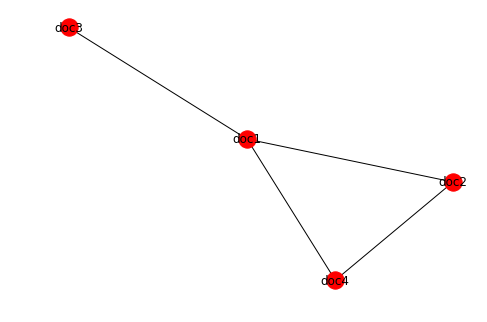

In [71]:

nx.draw(G,pos=nx.spring_layout(G),with_labels=True)
plt.draw() 